
##### GitHub: https://github.com/SouljaBoy-tell-em/CMS

### Решение модельного уравнения

Необходимо решить модельное уравнение:
$$
\begin{align}
\label{eq:dalq}
u'(t) = \lambda u(t)
\end{align}
$$
с начальным условием $u(0) = 1$ с помошью явного и неявного метода Эйлера. Считать, что $\lambda = -200$. Провести расчеты на сетке с числом узлов $N = 1001; 101; 100$. Построить графики решения на одном рисунке, объяснить результат. А именно объяснить, что мы видим на графике для каждого случая, какое это имеет отношение к А-устойчивости, почему именно так. Если поведение графиков отличается, объяснить чем вызвано отличие.

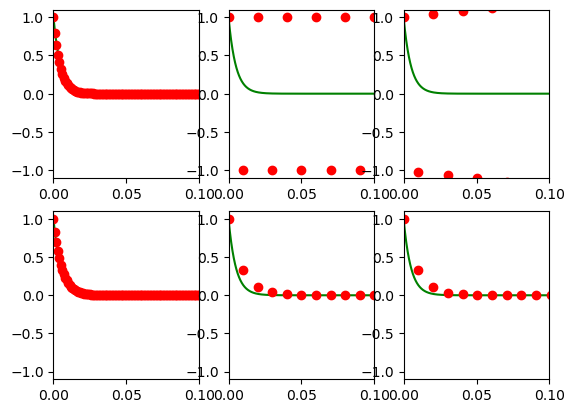

In [36]:
import matplotlib.pyplot as plt
import numpy as np


T = 1
N = 1001
h = 0
x = 0
x_teor = 0
l = -200
u = np.zeros(1)
u[0] = 1


#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N - 1):
        u[i + 1] = (1 + l * h) * u[i]

#implicit Euler method
def im_euler(u, l, h, N):
    for i in range(0, N - 1):
        u[i+1] = u[i] / (1 - l * h)

def Initializer(n):
    global N, h, x, x_teor, u
    T = 1
    N = n
    h = T / (N - 1)
    x = np.linspace(0, T, N)
    x_teor = np.linspace(0, T, (N - 1) * 100 + 1)
    l = -200
    u = np.zeros(N)
    u[0] = 1


figure, axis = plt.subplots(2, 3)
axis[0, 0].axis([0, 0.1, -1.1, 1.1])
axis[0, 1].axis([0, 0.1, -1.1, 1.1])
axis[0, 2].axis([0, 0.1, -1.1, 1.1])
axis[1, 0].axis([0, 0.1, -1.1, 1.1])
axis[1, 1].axis([0, 0.1, -1.1, 1.1])
axis[1, 2].axis([0, 0.1, -1.1, 1.1])


Initializer(1001)
ex_euler(u, l, h, N)
axis[0, 0].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[0, 0].plot(x, u, 'ro', label='explicit Euler')

Initializer(101)
ex_euler(u, l, h, N)
axis[0, 1].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[0, 1].plot(x, u, 'ro', label='explicit Euler')

Initializer(100)
ex_euler(u, l, h, N)
axis[0, 2].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[0, 2].plot(x, u, 'ro', label='explicit Euler')



Initializer(1001)
im_euler(u, l, h, N)
axis[1, 0].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[1, 0].plot(x, u, 'ro', label='implicit Euler')

Initializer(101)
im_euler(u, l, h, N)
axis[1, 1].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[1, 1].plot(x, u, 'ro', label='implicit Euler')

Initializer(100)
im_euler(u, l, h, N)
axis[1, 2].plot(x_teor, np.exp(l * x_teor), color='g', label='exact')
axis[1, 2].plot(x, u, 'ro', label='implicit Euler')

plt.show()

Для большей наглядности прикрепляю фото ниже:


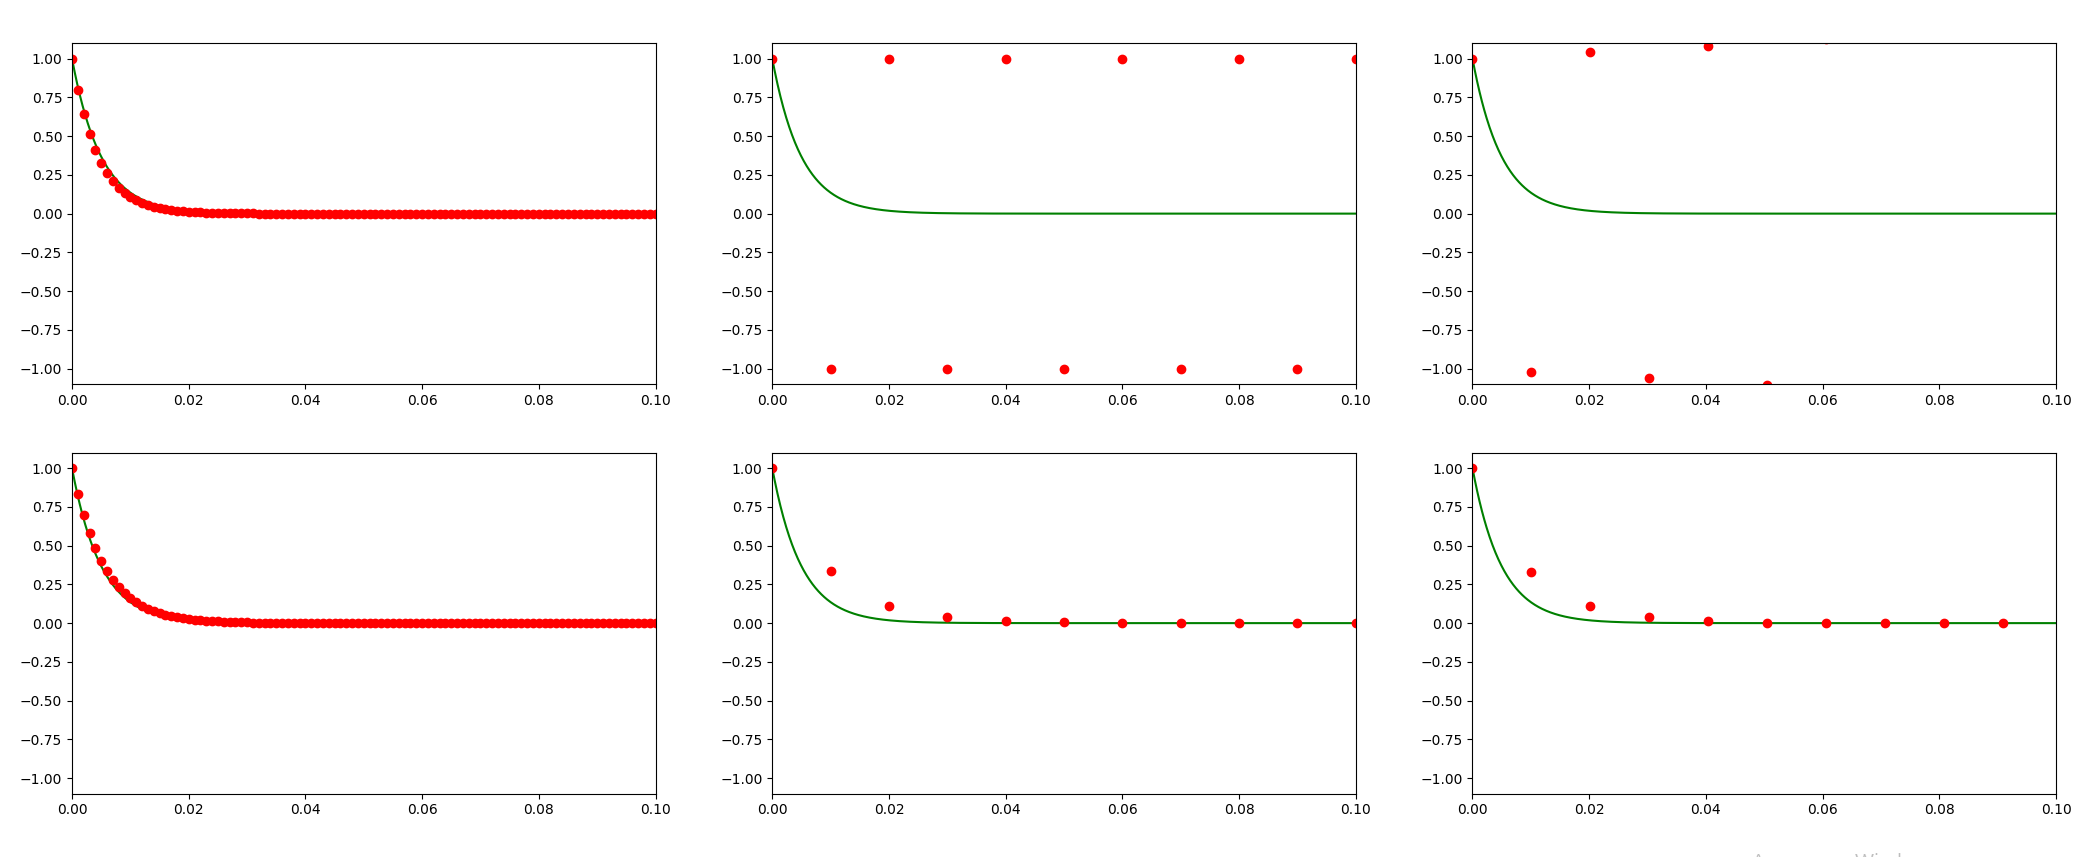


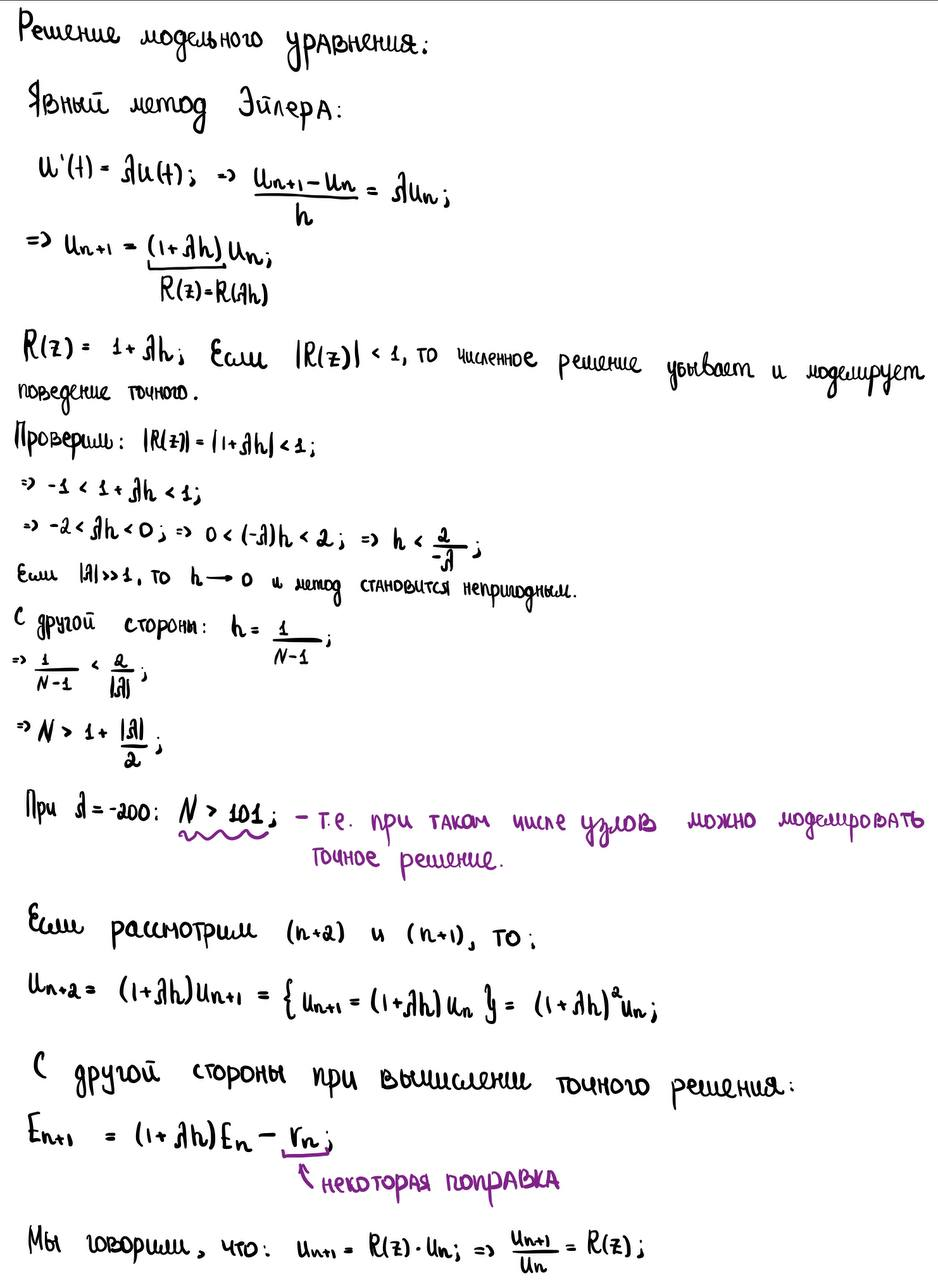
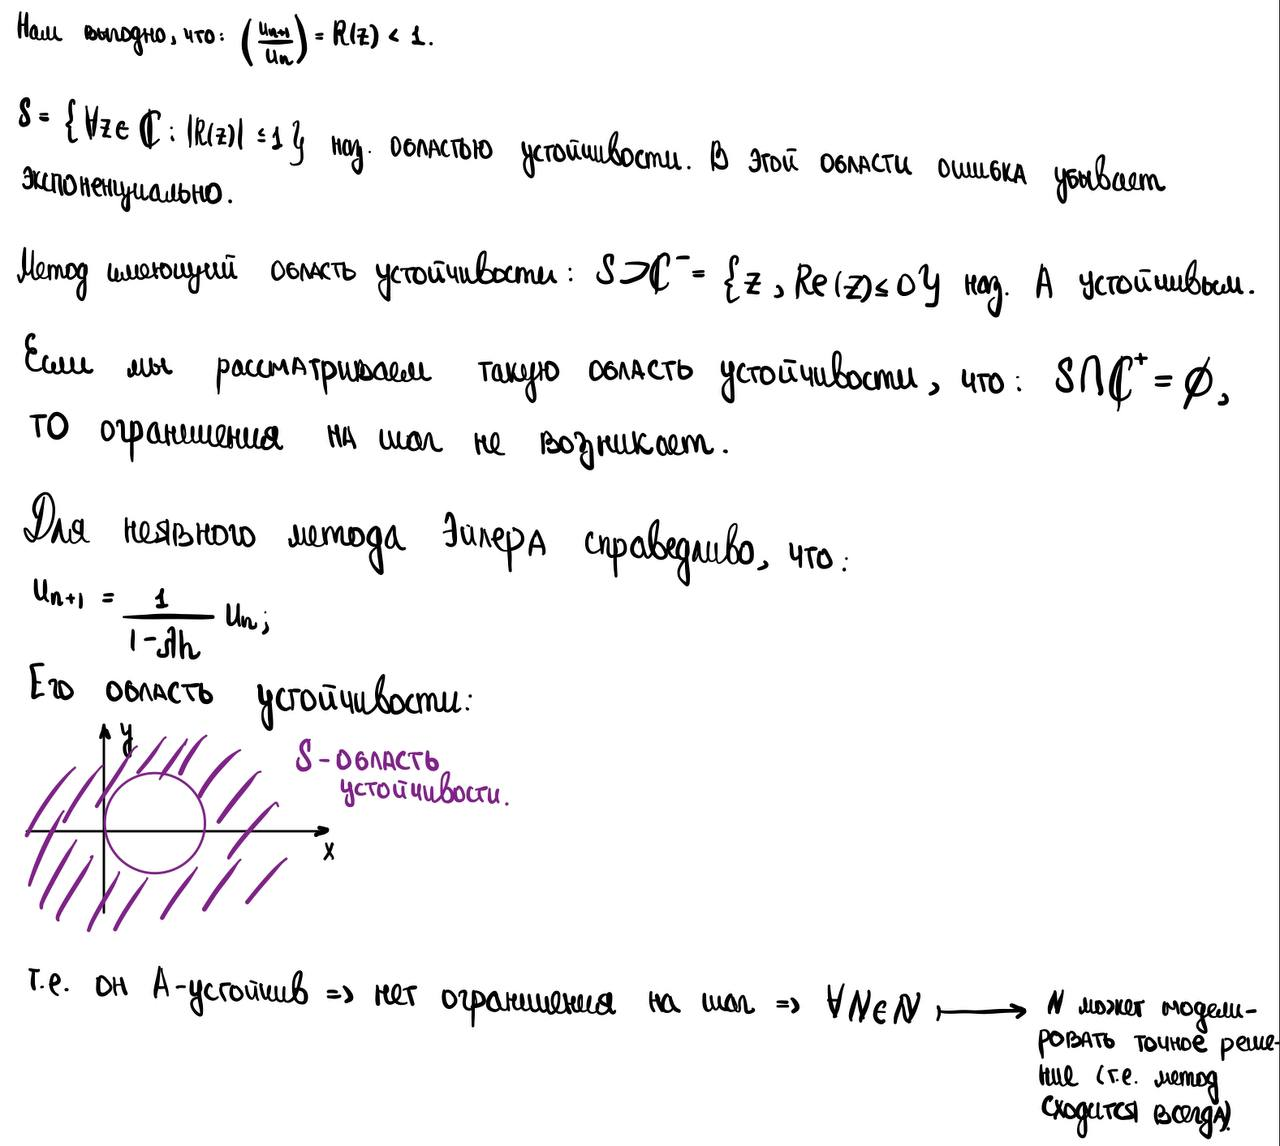

### L-устойчивость

Рассматриваем задачу $u' = l(u-cos(t)) - sin(t)$. Для начального условия $u(0) = 1$ решение $u(t) = cos(t)$. Для начального условия  $u(0) = g$ решение $u(t) = e^{lt}(g-1) + cos(t)$. Решите задачу на сетке с шагом $h = 0.1$ для начального условия $u(0) = 1$ и $u(0) = 1.5$ методом Эйлера и методом трапеции. В качестве решения постройте две картинки для разных начальных условий. На каждой картинке должно быть два графика для каждого из методов и сравнение с точным решением. Объясните получившиеся результаты. Как они согласуются с теорией? При чем тут L-устойчивость? 

Метод трапеции $$ \frac{u_{n+1} - u_n}{h} = \frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2}. $$


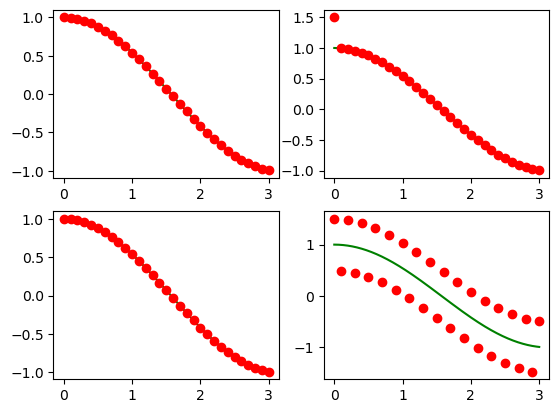

In [37]:
import numpy as np
import matplotlib.pyplot as plt


T = 3
N = 31
h = T/(N - 1)
x_teor = np.linspace(0, T, (N - 1) * 100 + 1)
x = np.linspace(0, T, N)
l = -1e6
u = np.zeros(N)

#implicit  Euler method
def im_euler(u, l, h, N):
    for i in range(0, N - 1):
        u[i + 1] = (u[i] - h * (l * np.cos((i + 1) * h) + np.sin((i + 1) * h))) / (1 - l * h)

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N - 1):
        free = l * (np.cos((i + 1) * h) + np.cos(i * h)) + (np.sin((i + 1) * h) + np.sin(i * h))
        u[i + 1] = (u[i] * (1 + l * h / 2) - h / 2 * free)/(1 - l * h / 2)



figure, axis = plt.subplots(2, 2)

u[0] = 1
im_euler(u, l, h, N)
axis[0, 0].plot(x_teor, np.cos(x_teor), color='g', label='exact')
axis[0, 0].plot(x, u, 'ro', label='implicit Euler')
u[0] = 1.5
im_euler(u, l, h, N)
axis[0, 1].plot(x_teor, np.cos(x_teor), color='g', label='exact')
axis[0, 1].plot(x, u, 'ro', label='implicit Euler')



u[0] = 1
trapezoidal(u, l, h, N)
axis[1, 0].plot(x_teor, np.cos(x_teor), color='g', label='exact')
axis[1, 0].plot(x, u, 'ro', label='trapezoidal')
u[0] = 1.5
trapezoidal(u, l, h, N)
axis[1, 1].plot(x_teor, np.cos(x_teor), color='g', label='exact')
axis[1, 1].plot(x, u, 'ro', label='trapezoidal')

plt.show()

Для большей наглядности прикрепляю фото ниже:

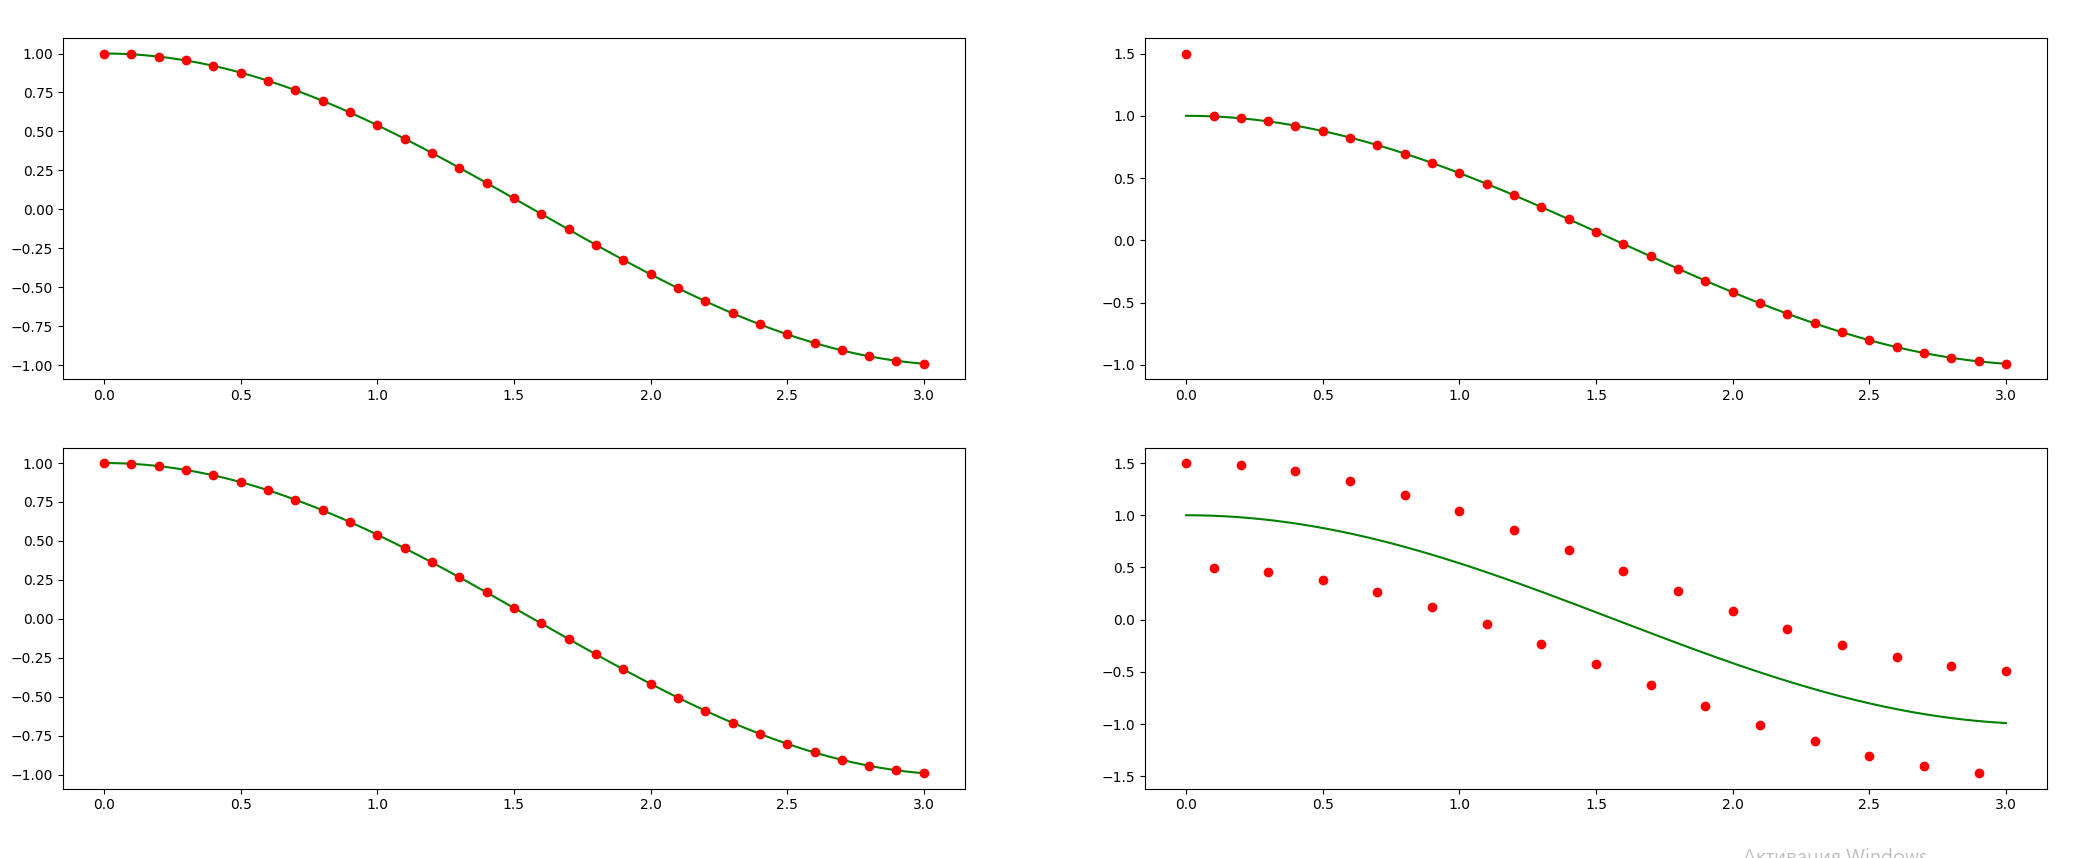

А также изобразим все на одном графике:

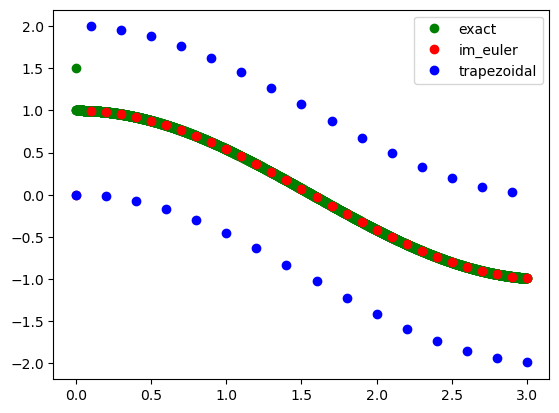

In [38]:
import numpy as np
import matplotlib.pyplot as plt


T = 3
N = 31
h = T/(N - 1)
x_teor = np.linspace(0, T, (N - 1) * 100 + 1)
x = np.linspace(0, T, N)
l = -1e6
u1 = np.zeros(N)
u2 = np.zeros(N)

#implicit  Euler method
def im_euler(u, l, h, N):
    for i in range(0, N - 1):
        u[i + 1] = (u[i] - h * (l * np.cos((i + 1) * h) + np.sin((i + 1) * h))) / (1 - l * h)

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N - 1):
        free = l * (np.cos((i + 1) * h) + np.cos(i * h)) + (np.sin((i + 1) * h) + np.sin(i * h))
        u[i + 1] = (u[i] * (1 + l * h / 2) - h / 2 * free)/(1 - l * h / 2)

im_euler(u1, l, h, N)
trapezoidal(u2, l, h, N)
plt.plot(x_teor, np.cos(x_teor) + (u[0] - 1) * np.exp(l * x_teor), 'go', label='exact')
plt.plot(x, u1, 'ro', label='im_euler')
plt.plot(x, u2, 'bo', label='trapezoidal')
plt.legend(['exact', 'im_euler','trapezoidal'], loc=1)
plt.show()

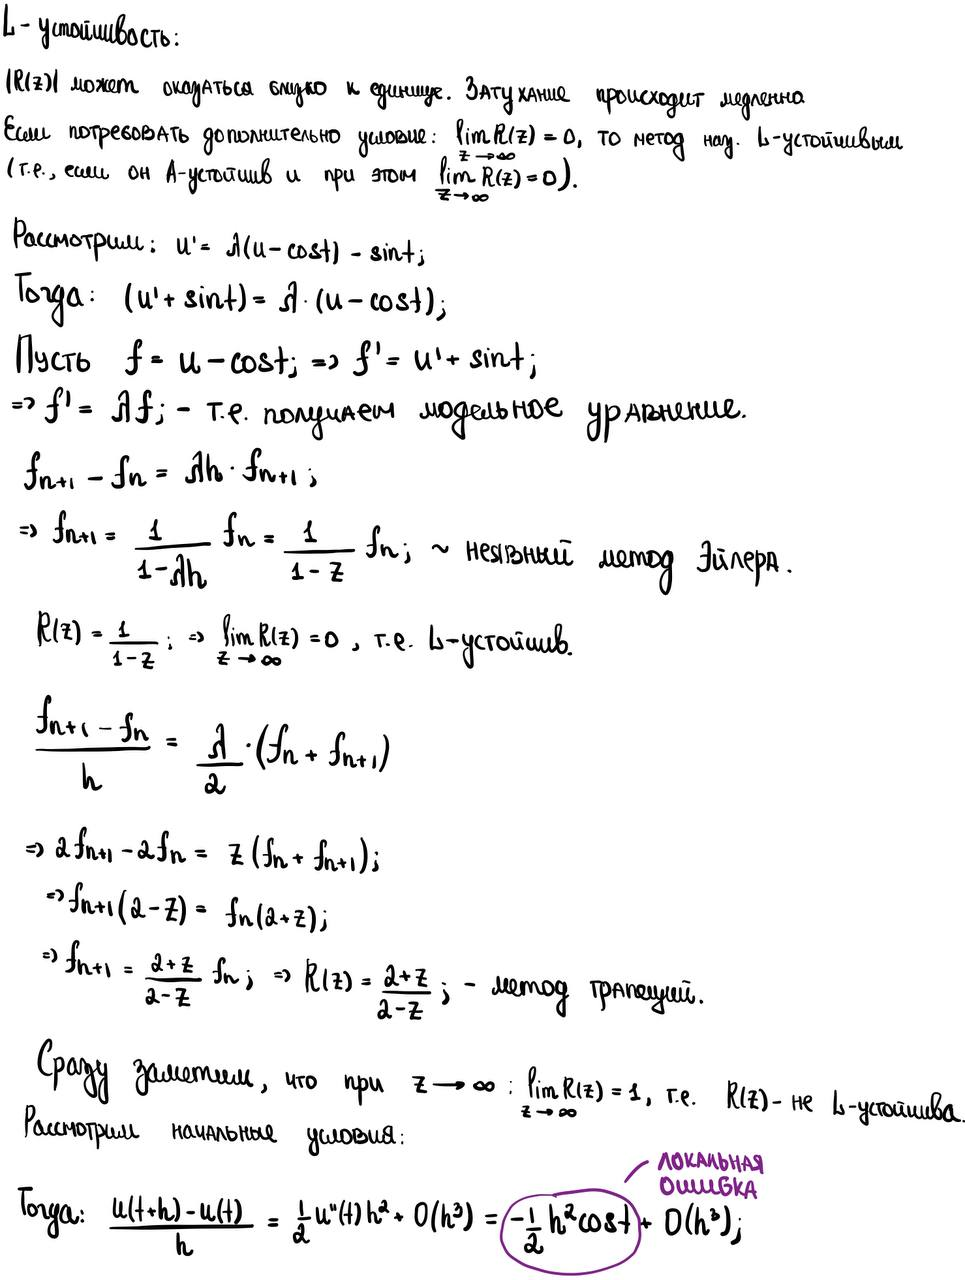
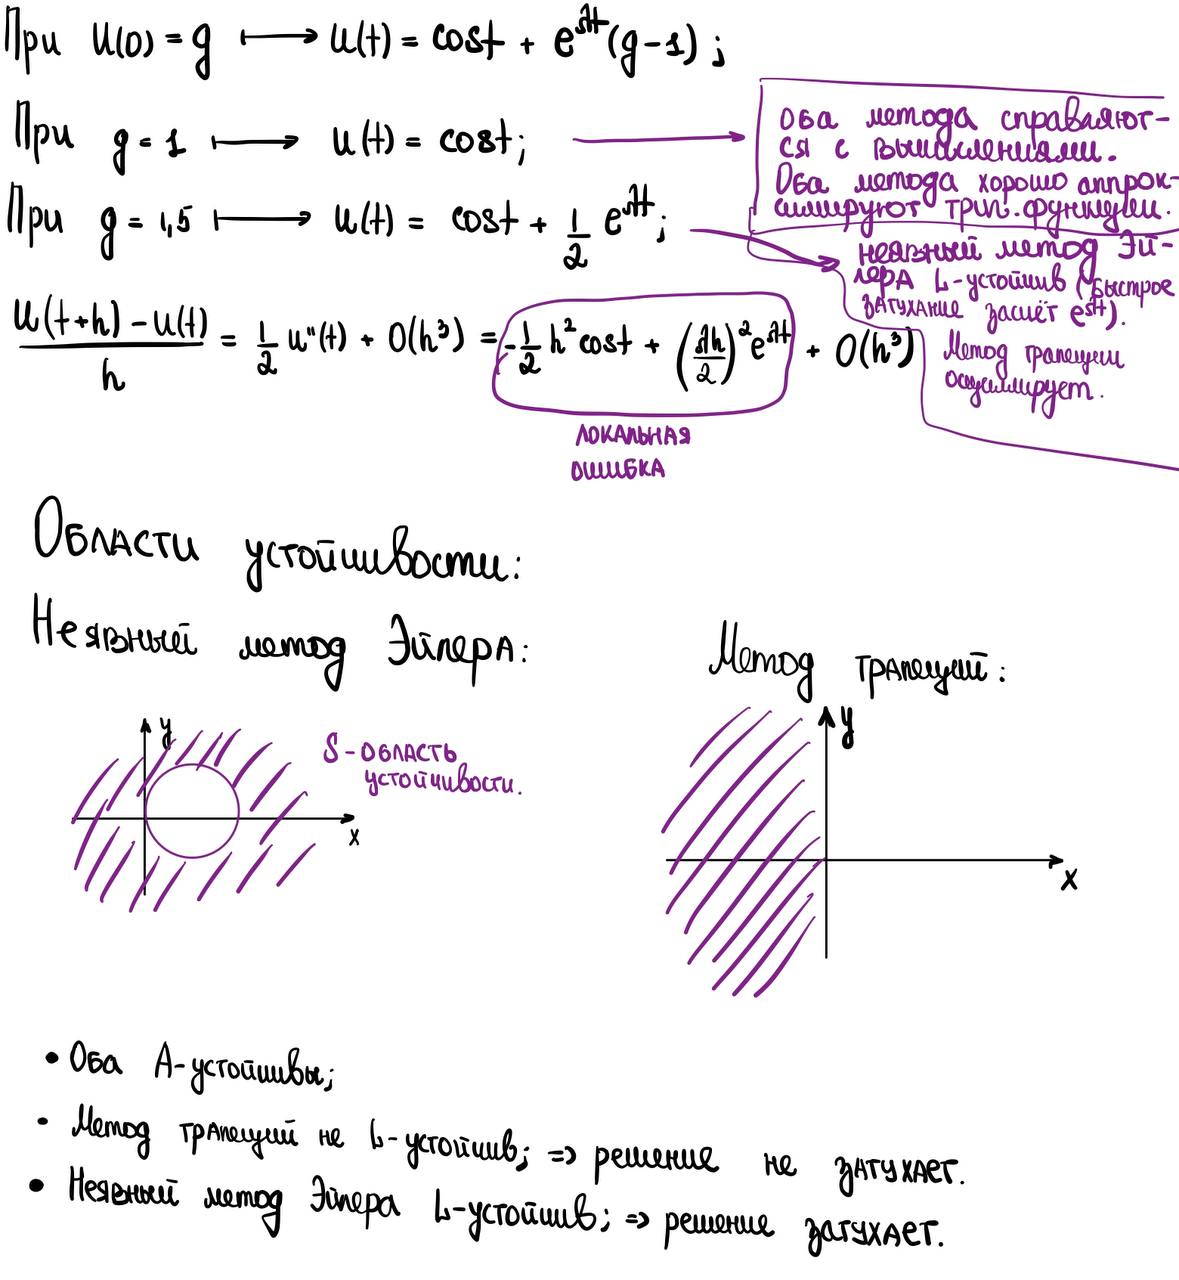